In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

yolo = cv2.dnn.readNet(".../yolov2.weights", ".../CW.cfg")

classes = []
with open("...classes.names", 'r') as f:
    classes = f.read().splitlines()

In [51]:
len(classes)

2

In [61]:
classes

['crop', 'weed']

In [87]:
# Importing Images

img = cv2.imread("...images_1/crop.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (255,51,204), swapRB=True, crop=False)

blob.shape

(1, 3, 320, 320)

In [79]:
yolo.setInput(blob)

output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [81]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput :
    for detection in output :
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [83]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (2,3))

if len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
    
        label = str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
    
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 3)
        cv2.putText(img, label +" "+confi, (x,y+20), font, 2, (0,0,0), 3)

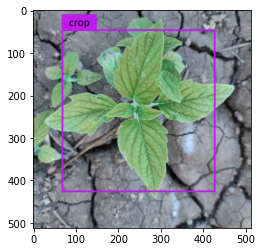

In [86]:
plt.imshow(img)

In [91]:
img1 = cv2.imread(".../image_1/weed.jpg")

blob = cv2.dnn.blobFromImage(img1, 1/255, (320,320), (255,51,204), swapRB=True, crop=False)

blob.shape

yolo.setInput(blob)

output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)
boxes = []
confidences = []
class_ids = []

for output in layeroutput :
    for detection in output :
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)           

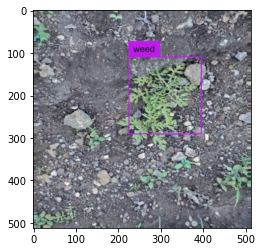

In [93]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size = (2,3))

if len(indexes)>0:
    for i in indexes.flatten():
        x,y,w,h = boxes[i]
    
        label = str(classes[class_ids[i]])
        confi = str(round(confidences[i],2))
        color = colors[i]
    
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 3)
        cv2.putText(img, label +" "+confi, (x,y+20), font, 2, (0,0,0), 3)

plt.imshow(img1)